## 0. Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import aux_functions as f
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st
import scipy.stats as stats

## 0.1 Read data

In [2]:
df = pd.read_csv("data/df_clean_all.csv", index_col = None)
df = df.reset_index(drop=True)
df = df.drop(columns='Unnamed: 0')
df['date_time'] = pd.to_datetime(df['date_time'])
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2,45105.30,6.0,9.0,boomers,low,0-100k,5-10,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317118,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
317119,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
317120,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
317121,7468138,18.0,222.0,61.0,F,3,209278.15,0.0,3.0,boomers,low,100-500k,15-20,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [3]:
df.dtypes

client_id                      int64
clnt_tenure_yr               float64
clnt_tenure_mnth             float64
clnt_age                     float64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                 float64
logons_6_mnth                float64
generation                    object
testing_engagement            object
balance_level                 object
tenure                        object
Variation                     object
visitor_id                    object
visit_id                      object
process_step                  object
date_time             datetime64[ns]
dtype: object

## **Day 1**

1. Who are the primary clients using this online process?
2. Are the primary clients younger or older, new or long-standing?

In [4]:
df_control = df[df['Variation']== 'Control']
df_test = df[df['Variation']== 'Test']

### 1. Who are the primary clients using this online process? 

In [5]:
frequency_table_control, proportion_table_control, frequency_table_test, proportion_table_test = f.create_frequency_table(df_control, df_test, 'gendr')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\270614438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\270614438.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");


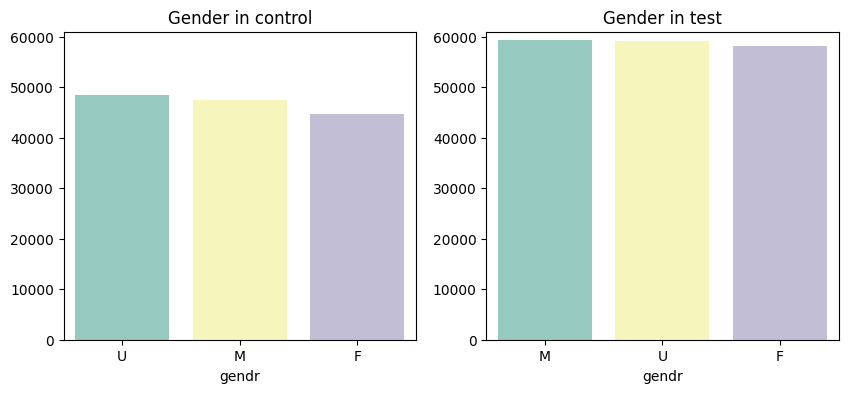

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_control.index, y=frequency_table_control.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_test.index, y=frequency_table_test.values, palette="Set3");
plt.ylim([0,61000])
plt.title('Gender in test')
plt.show()

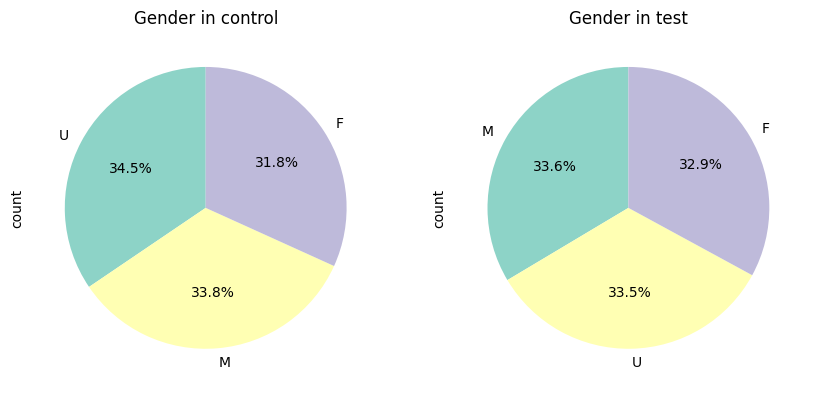

In [7]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender in control')
plt.subplot(1,2,2)
frequency_table_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Gender in test')
plt.show()

In [8]:
frequency_table_generation_control, proportion_table_generation_control, frequency_table_generation_test, proportion_table_generation_test = f.create_frequency_table(df_control, df_test, 'generation')

C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\3191112310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\3191112310.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");


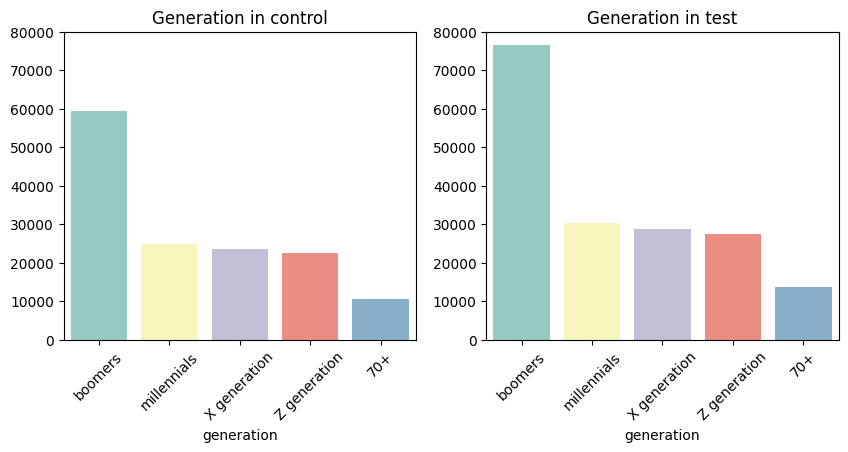

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=frequency_table_generation_control.index, y=frequency_table_generation_control.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in control')
plt.subplot(1,2,2)
sns.barplot(x=frequency_table_generation_test.index, y=frequency_table_generation_test.values, palette="Set3");
plt.ylim([0,80000])
plt.xticks(rotation=45)
plt.title('Generation in test')
plt.show()

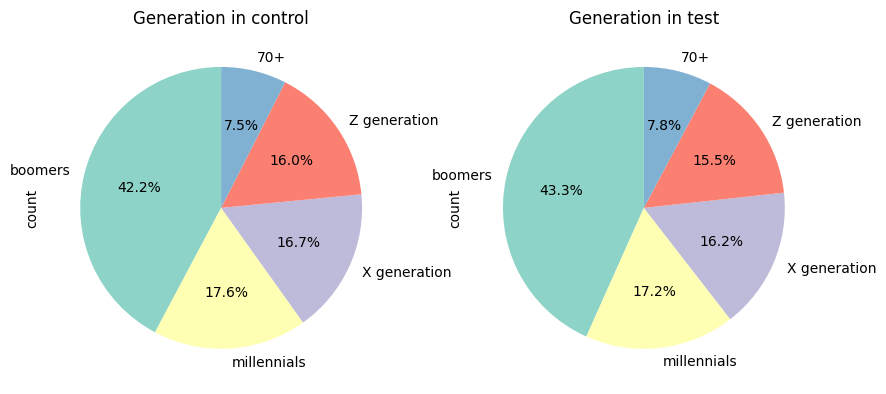

In [10]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
frequency_table_generation_control.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in control')
plt.subplot(1,2,2)
frequency_table_generation_test.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Generation in test')
plt.show()

In [11]:
df_control.shape[0], df_test.shape[0]

(140482, 176641)

### 2. Are the primary clients younger or older, new or long-standing? 

In [12]:
frequency_table_tenure_control, proportion_table_tenure_control, frequency_table_tenure_test, proportion_table_tenure_test = f.create_frequency_table(df_control, df_test, 'tenure')

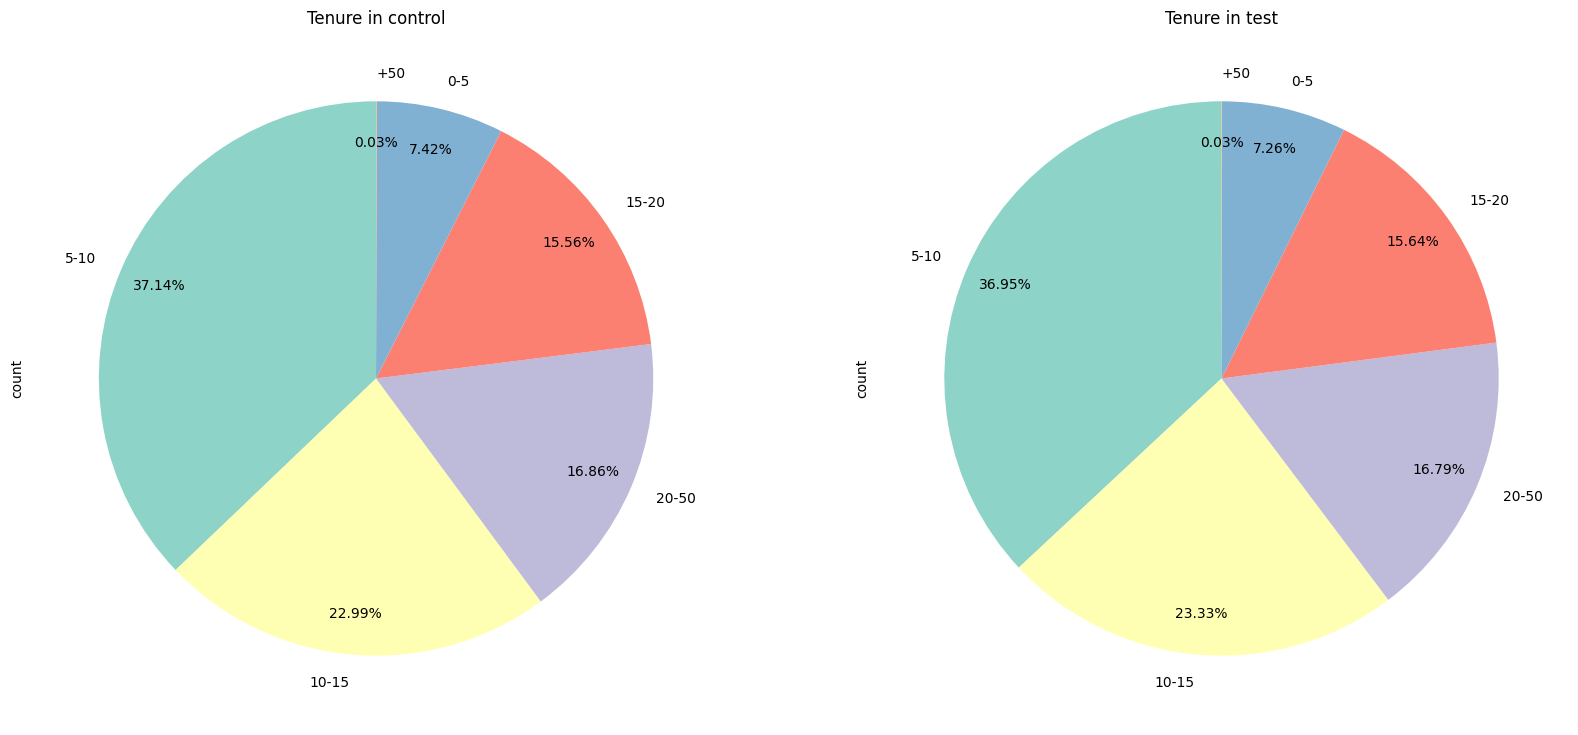

In [13]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_tenure_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Tenure in control')
plt.subplot(1,2,2)
frequency_table_tenure_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Tenure in test')
plt.show()

In [14]:
frequency_table_balance_level_control, proportion_table_balance_level_control, frequency_table_balance_level_test, proportion_table_balance_level_test = f.create_frequency_table(df_control, df_test, 'balance_level')

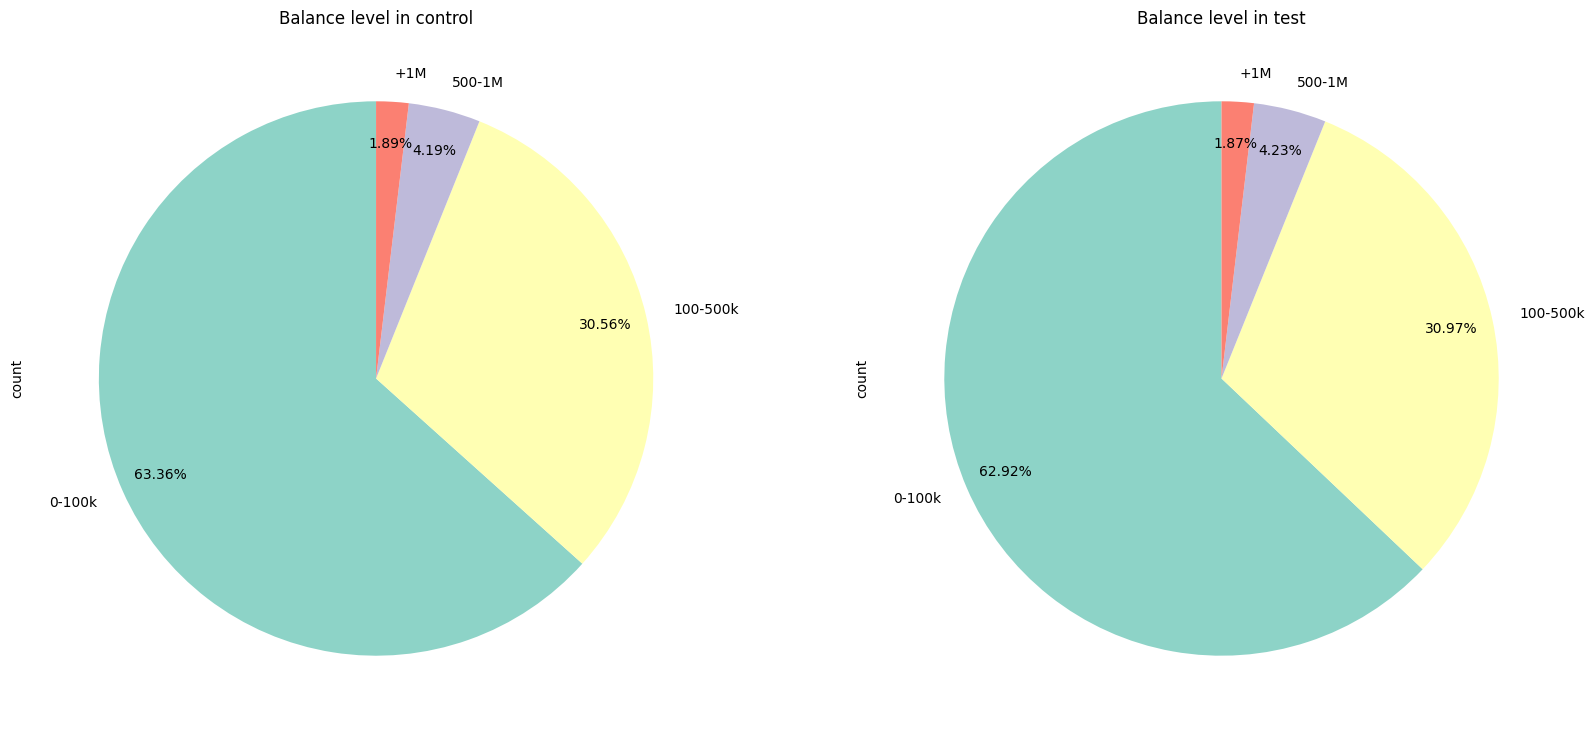

In [15]:
plt.figure(figsize=(20,9))
plt.subplot(1,2,1)
frequency_table_balance_level_control.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1  )

plt.title('Balance level in control')
plt.subplot(1,2,2)
frequency_table_balance_level_test.plot.pie(autopct='%1.2f%%', startangle=90, colors=sns.color_palette("Set3"), pctdistance=0.85, labeldistance=1.1 )
plt.title('Balance level in test')
plt.show()

#### Review there aren't any clients in control and test at the same time

In [ ]:
clientes_control = df_control['client_id'].tolist()
clientes_test = df_test['client_id'].tolist()

both_experiments = []

for i in clientes_control:
    if i in clientes_test: 
        both_experiments.append(i)

In [ ]:
both_experiments

## **Day 3**: KPIs

1. **Completation Rate:** The proportion of users who reach the final *confirm* step
2. **Time Spent on Each Step**: The average duration users spend on each step.
3. **Error Rates**: If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [16]:
df = df.sort_values(by=['visit_id', 'process_step'])
df[['client_id', 'visit_id', 'process_step', 'date_time']]

,client_id,visit_id,process_step,date_time
300409,3561384,100012776_37918976071_457913,confirm,2017-04-26 13:23:09
300410,3561384,100012776_37918976071_457913,confirm,2017-04-26 13:22:17
76844,7338123,100019538_17884295066_43909,confirm,2017-04-09 16:24:58
76848,7338123,100019538_17884295066_43909,start,2017-04-09 16:21:59
76849,7338123,100019538_17884295066_43909,start,2017-04-09 16:21:45
...,...,...,...,...
196186,6627522,999988789_76411676596_272843,start,2017-04-21 23:51:09
196190,6627522,999988789_76411676596_272843,start,2017-04-21 23:49:11
196187,6627522,999988789_76411676596_272843,step_1,2017-04-21 23:51:00
196189,6627522,999988789_76411676596_272843,step_1,2017-04-21 23:49:22


In [17]:
df_test = df[df['Variation'] == 'Test']
df_test = df_test.sort_values(by=['visit_id', 'process_step'])
df_control = df[df['Variation'] == 'Control']
df_control = df_control.sort_values(by=['visit_id', 'process_step'])

In [18]:
df_test_no_repetition = f.no_repetition(df_test)
df_control_no_repetition = f.no_repetition(df_control)

In [19]:
completation_rate_test_no_rep = f.step_rate(df_test_no_repetition, 'confirm')
completation_rate_test_no_rep

69.21

In [20]:
# Test completion rate for test group
df_test[df_test["process_step"] == "confirm"]
df_test['repetition'] = df_test.duplicated(subset=["visit_id", "process_step"], keep="last")
df_test
df_test_no_repetition = df_test[df_test['repetition'] == False]
df_test_no_repetition
df_test_confirm = df_test_no_repetition[df_test_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_test_confirm.shape[0]/df_test.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

69.1

In [21]:
completation_rate_control_no_rep = f.step_rate(df_control_no_repetition, 'confirm')
completation_rate_control_no_rep

65.51

In [22]:
# Test completion rate for test group
df_control[df_control["process_step"] == "confirm"]
df_control['repetition'] = df_control.duplicated(subset=["visit_id", "process_step"], keep="last")
df_control
df_control_no_repetition = df_control[df_control['repetition'] == False]
df_control_no_repetition
df_control_confirm = df_control_no_repetition[df_control_no_repetition["process_step"] == "confirm"].groupby("client_id").agg({"process_step":"count"})
round(df_control_confirm.shape[0]/df_control.groupby("client_id").agg({"process_step":"count"}).shape[0]*100, 2)

65.4

### 2. Time Spent on Each Step: The average duration users spend on each step

In [23]:
df_control_no_repetition[['client_id', 'visit_id', 'process_step', 'date_time']].sort_values(by=['visit_id', 'date_time', 'client_id'])

,client_id,visit_id,process_step,date_time
148115,105007,100030127_47967100085_936361,start,2017-03-22 11:07:49
226763,5623007,100037962_47432393712_705583,start,2017-04-14 16:41:51
226761,5623007,100037962_47432393712_705583,step_1,2017-04-14 16:43:55
136962,4823947,100057941_88477660212_944512,start,2017-04-09 11:30:10
136961,4823947,100057941_88477660212_944512,step_1,2017-04-09 11:30:40
...,...,...,...,...
96143,4064969,999985675_64610694964_443659,start,2017-04-20 09:45:18
96142,4064969,999985675_64610694964_443659,step_1,2017-04-20 09:46:26
96141,4064969,999985675_64610694964_443659,step_2,2017-04-20 09:47:04
96140,4064969,999985675_64610694964_443659,step_3,2017-04-20 09:48:45


In [24]:
df_control_tiempo = f.time_spent_each_step(df_control_no_repetition)
df_control_tiempo[['client_id', 'visit_id', 'process_step', 'date_time', 'time_spent']]

,client_id,visit_id,process_step,date_time,time_spent
298528,1028,557292053_87239438319_391157,start,2017-04-08 18:51:28,NaT
298527,1028,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,0 days 00:00:49
298525,1028,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,0 days 00:01:12
298524,1028,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,0 days 00:04:35
130633,1104,543158812_46395476577_767725,start,2017-06-12 07:49:18,NaT
...,...,...,...,...,...
141088,9998346,189177304_69869411700_783154,step_1,2017-03-29 15:26:02,0 days 00:01:02
141087,9998346,189177304_69869411700_783154,step_2,2017-03-29 15:26:47,0 days 00:00:45
141084,9998346,189177304_69869411700_783154,step_3,2017-03-29 15:28:00,0 days 00:01:13
141080,9998346,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,0 days 00:09:28


In [25]:
avg_time_per_step_control = df_control_tiempo.groupby('process_step')['time_spent'].mean()
avg_time_per_step_control

process_step
confirm   0 days 00:02:47.041895784
start               0 days 00:10:43
step_1    0 days 00:01:01.407514450
step_2    0 days 00:00:48.819996997
step_3    0 days 00:01:52.058648111
Name: time_spent, dtype: timedelta64[ns]

In [26]:
df_test_tiempo = f.time_spent_each_step(df_test_no_repetition)
df_test_tiempo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,testing_engagement,balance_level,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,time_spent
252082,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,False,NaT
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,False,0 days 00:00:07
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,False,0 days 00:00:32
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,False,0 days 00:01:39
252078,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,low,0-100k,0-5,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,False,0 days 00:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306138,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,False,0 days 00:00:21
306133,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,False,NaT
306132,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,low,100-500k,10-15,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,False,0 days 00:00:15
50558,9999832,23.0,281.0,49.0,F,2,431887.61,1.0,4.0,X generation,low,100-500k,20-50,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,False,NaT


In [27]:
avg_time_per_step_test = f.mean_time_spent(df_test_tiempo)
avg_time_per_step_test

process_step
confirm   0 days 00:02:25.773403849
start     0 days 00:08:10.553516819
step_1    0 days 00:00:52.309504147
step_2    0 days 00:01:13.718273902
step_3    0 days 00:01:48.584083329
Name: time_spent, dtype: timedelta64[ns]

### 3. **Error Rates:** If there’s a step where users go back to a previous step, it may indicate confusion or an error. You should consider moving from a later step to an earlier one as an error.

In [28]:
df_control = df_control.sort_values(by=['client_id', 'visit_id', 'date_time'])
df_control[['client_id', 'visit_id', 'process_step', 'date_time']]
df_test = df_test.sort_values(by=['client_id', 'visit_id', 'date_time'])

In [29]:
df_control_error = f.transform_to_errores(df_control)
percentage_error_control = f.percentage_errors(df_control_error)
percentage_error_control

Percentage of errors : 6.920459560655458


np.float64(6.920459560655458)

In [30]:
df_test_error = f.transform_to_errores(df_test)
percentage_error_test = f.percentage_errors(df_test_error)
percentage_error_test

Percentage of errors : 9.211904371012393


np.float64(9.211904371012393)

##### 3.1 Error rate per category
1. Gender 
2. Generation
3. Testing_engagement 
4. Balance level
5. Tenure


Error rate per generation: generation
70+             0.082677
X generation    0.065539
Z generation    0.067288
boomers         0.072924
millennials     0.059775
Name: is_error, dtype: float64
Error rate per generation: generation
70+             0.125391
X generation    0.081882
Z generation    0.072545
boomers         0.105744
millennials     0.070067
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


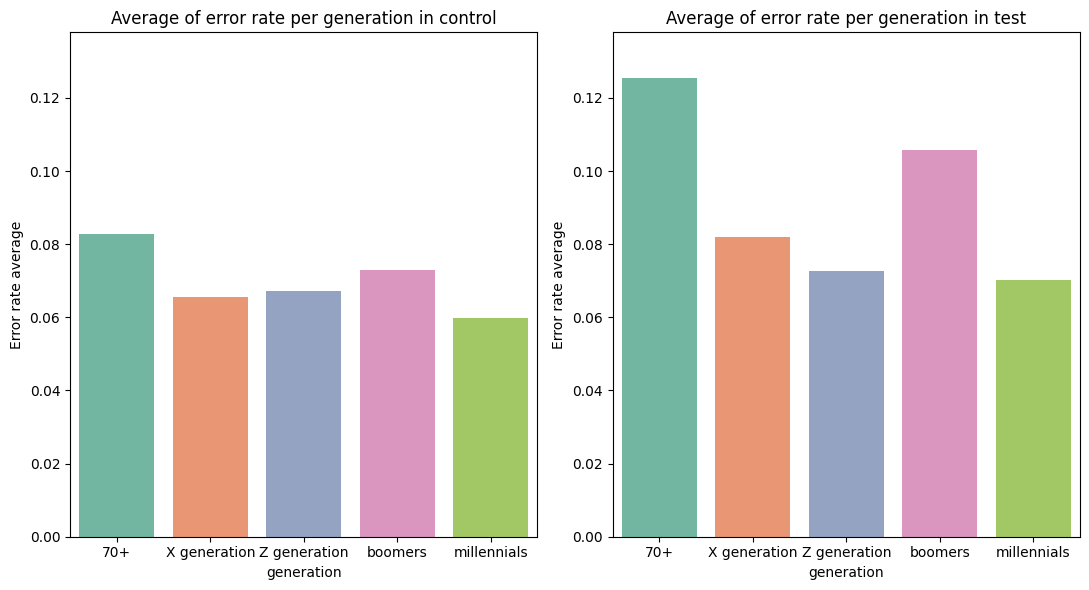

Error rate per testing_engagement: testing_engagement
high    0.060945
low     0.069252
Name: is_error, dtype: float64
Error rate per testing_engagement: testing_engagement
high    0.066127
low     0.092229
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


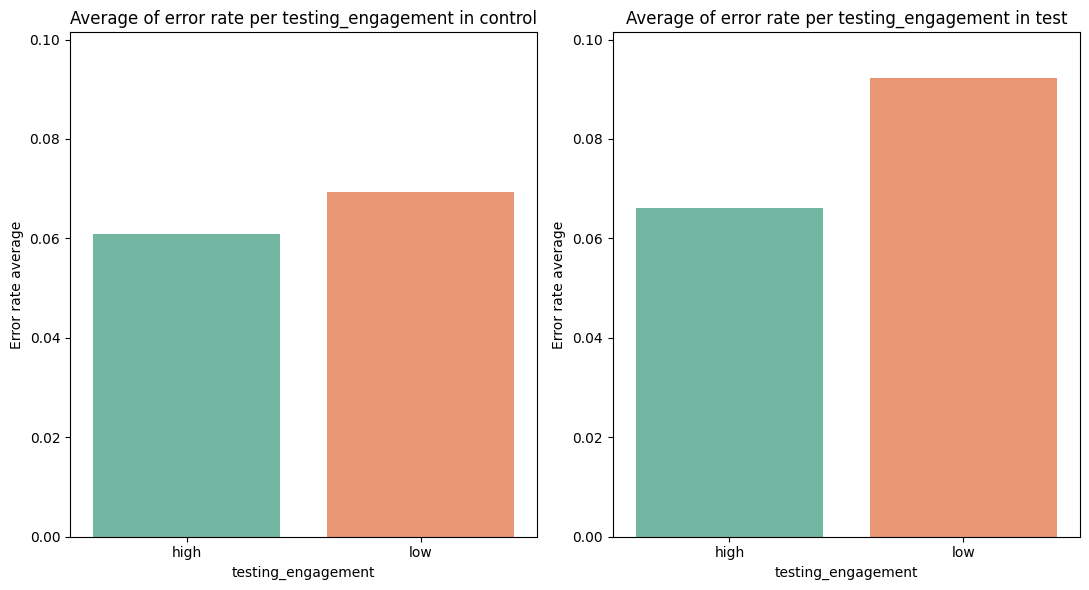

Error rate per balance_level: balance_level
+1M         0.065561
0-100k      0.068188
100-500k    0.071041
500-1M      0.072823
Name: is_error, dtype: float64
Error rate per balance_level: balance_level
+1M         0.092145
0-100k      0.089421
100-500k    0.097107
500-1M      0.095716
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


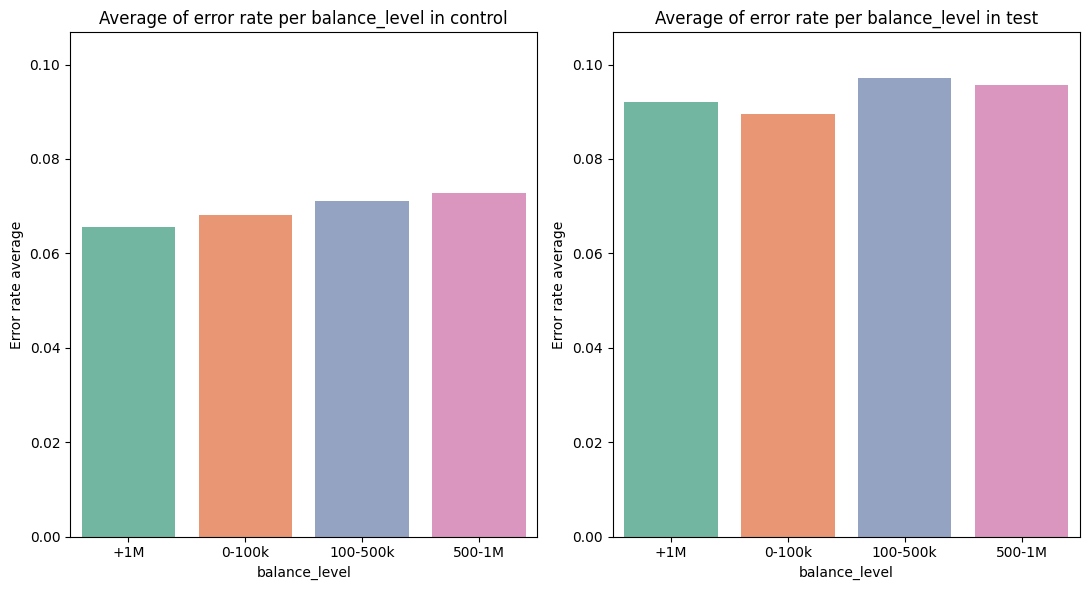

Error rate per tenure: tenure
+50      0.148936
0-5      0.070819
10-15    0.066047
15-20    0.066642
20-50    0.071187
5-10     0.070938
Name: is_error, dtype: float64
Error rate per tenure: tenure
+50      0.061224
0-5      0.087031
10-15    0.093011
15-20    0.096805
20-50    0.098375
5-10     0.087751
Name: is_error, dtype: float64


c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_control', data=df_control, palette='Set2')
c:\Users\Carlota\OneDrive\Documentos\Bootcamp Data Analysis\vanguard-ab-test\aux_functions.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category, y='error_rate_test', data=df_test, palette='Set2')


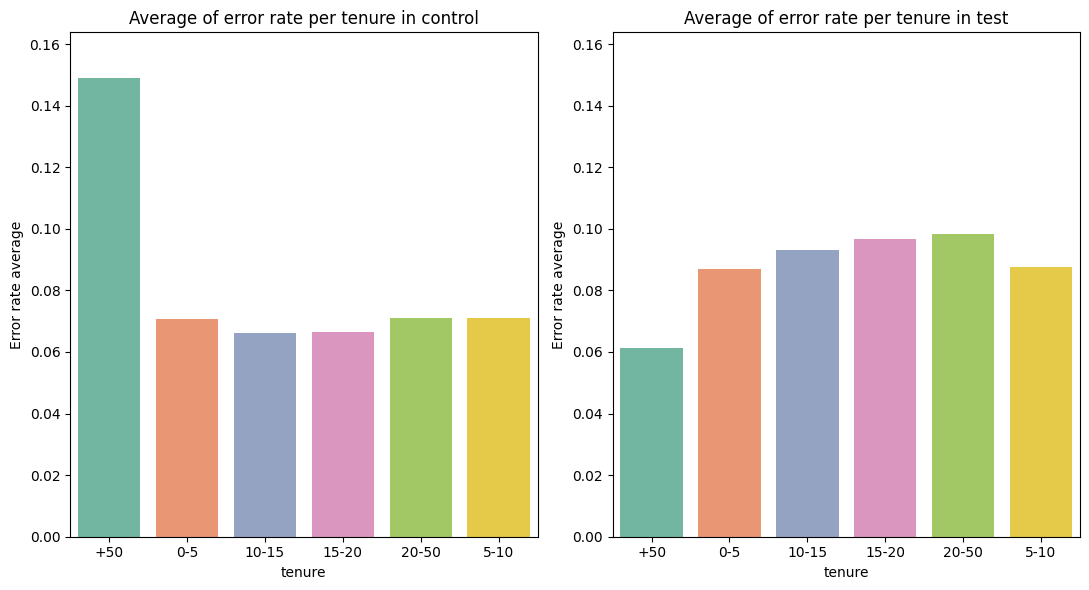

In [31]:
list_category = ['generation','testing_engagement', 'balance_level', 'tenure']
for i in list_category:
    avg_control = f.mean_errors_per_category(df_control_error, i)
    avg_test = f.mean_errors_per_category(df_test_error, i)
    
    f.create_barplot_error(avg_control, avg_test, i)

#### 2.1 Average of time spent per step without errors

In [32]:
df_control_error_no_rep = f.transform_to_errores(df_control_no_repetition)
df_test_error_no_rep = f.transform_to_errores(df_test_no_repetition)

In [33]:
df_valid_control = f.without_error(df_control_error_no_rep)
df_valid_control

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,step_order,previous_step_order,is_error
298528,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,10-15,Control,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,False,0,NaN,False
298527,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,False,1,0.0,False
298525,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,False,2,1.0,False
298524,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,10-15,Control,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,False,3,2.0,False
130633,1104,5.0,66.0,48.0,U,3,154643.94,6.0,9.0,X generation,...,5-10,Control,194240915_18158000533,543158812_46395476577_767725,start,2017-06-12 07:49:18,False,0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141088,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_1,2017-03-29 15:26:02,False,1,0.0,False
141087,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:26:47,False,2,1.0,False
141084,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,+50,Control,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:28:00,False,3,2.0,False
141080,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,+50,Control,292425655_16607136645,189177304_69869411700_783154,confirm,2017-03-29 15:37:28,False,4,3.0,False


In [34]:
df_valid_test = f.without_error(df_test_error_no_rep)
df_valid_test

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,tenure,Variation,visitor_id,visit_id,process_step,date_time,repetition,step_order,previous_step_order,is_error
252082,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-5,Test,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,False,0,NaN,False
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,False,1,0.0,False
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,False,2,1.0,False
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-5,Test,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,False,3,2.0,False
252078,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,0-5,Test,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,False,4,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306138,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,10-15,Test,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,False,4,3.0,False
306133,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,10-15,Test,604429154_69247391147,99583652_41711450505_426179,start,2017-04-05 13:40:49,False,0,NaN,False
306132,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,10-15,Test,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,False,1,0.0,False
50558,9999832,23.0,281.0,49.0,F,2,431887.61,1.0,4.0,X generation,...,20-50,Test,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,False,0,NaN,False


In [35]:
df_valid_control_time = f.time_spent_each_step(df_valid_control)
time_spent_control = f.mean_time_spent(df_valid_control_time)
df_time_spent_control = pd.DataFrame(time_spent_control).reset_index()
df_time_spent_control = df_time_spent_control[df_time_spent_control['process_step']!='start']
df_time_spent_control['process_step'] = df_time_spent_control['process_step'].replace({'step_1': 'start', 'step_2': 'step_1', 'step_3':'step_2', 'confirm':'step_3'})
df_time_spent_control = df_time_spent_control.sort_values(by='process_step')
df_time_spent_control

,process_step,time_spent
2,start,0 days 00:01:01.182263660
3,step_1,0 days 00:00:48.498965116
4,step_2,0 days 00:01:51.288373648
0,step_3,0 days 00:02:46.709607131


In [36]:
df_valid_test_time = f.time_spent_each_step(df_valid_test)
time_spent_test = f.mean_time_spent(df_valid_test_time)
df_time_spent_test = pd.DataFrame(time_spent_test).reset_index()
df_time_spent_test = df_time_spent_test[df_time_spent_test['process_step']!='start']
df_time_spent_test['process_step'] = df_time_spent_test['process_step'].replace({'step_1': 'start', 'step_2': 'step_1', 'step_3':'step_2', 'confirm':'step_3'})
df_time_spent_test = df_time_spent_test.sort_values(by='process_step')
df_time_spent_test

,process_step,time_spent
2,start,0 days 00:00:51.910440215
3,step_1,0 days 00:01:12.786581815
4,step_2,0 days 00:01:47.687517311
0,step_3,0 days 00:02:24.714089535


C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\2129171798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_control, palette='viridis')
C:\Users\Carlota\AppData\Local\Temp\ipykernel_10004\2129171798.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_test, palette='viridis')


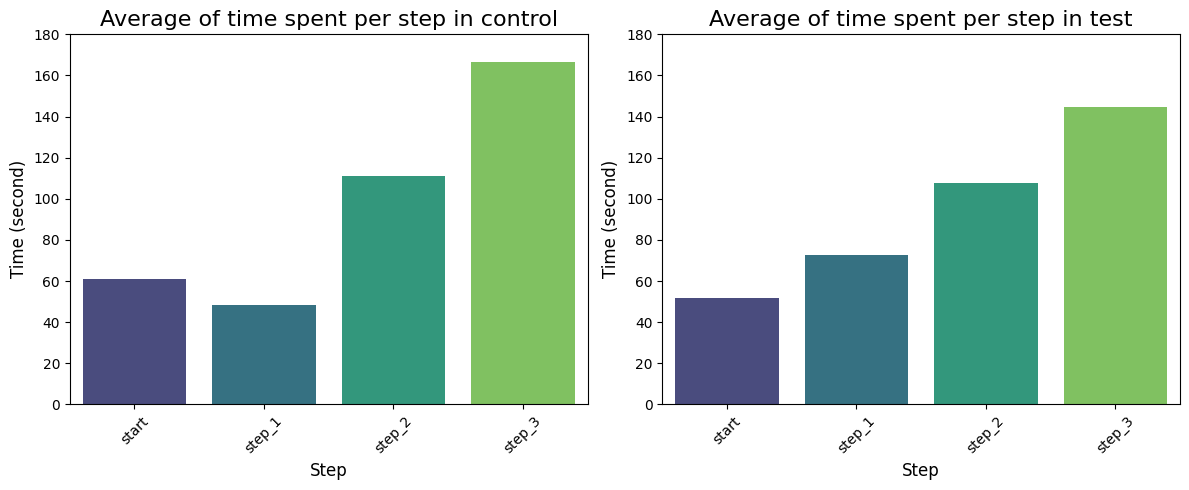

In [37]:
df_time_spent_control['time_spent_seconds'] = df_time_spent_control['time_spent'].dt.total_seconds()
df_time_spent_test['time_spent_seconds'] = df_time_spent_test['time_spent'].dt.total_seconds()


plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_control, palette='viridis')

plt.title('Average of time spent per step in control', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.ylim([0,180])
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(x='process_step', y='time_spent_seconds', data=df_time_spent_test, palette='viridis')
plt.ylim([0,180])
plt.title('Average of time spent per step in test', fontsize=16)
plt.xlabel('Step', fontsize=12)
plt.ylabel('Time (second)', fontsize=12)
plt.xticks(rotation=45)


plt.tight_layout()

plt.show()

## **Days 4 and 5**
1. Confirmed if the difference in completion rate of the new design and the old design is statistically significant. 
2. Carried out an analysis ensuring that the observed increase in completation rate from the A/B test meets or exceeds this 5% threshold.
3. Carried out another hypothesis test of your choosing. 
4. Evaluated the experiment by answering questions relating to: 
    - Design Effectiveness
    - Duration 
    - Additional Data Needs

### 1. Confirmed if the difference in completetion rate of the new design and the old design is statistically significant. 

In [38]:
# Create a new column 'reached_confirm' that is True if user pass by 'confirm' step and False on the opposite case
df['reached_confirm'] = df['process_step'] == 'confirm'

# Filter DataFrame for groups "test" and "control"
df_test = df[df['Variation'] == 'Test']
df_control = df[df['Variation'] == 'Control']

# Create cross tab for  "test" group
contingency_test = pd.crosstab(df_test['visit_id'], df_test['reached_confirm'], 
                                rownames=['visit_id'], colnames=['reached_confirm'], 
                                margins=True, margins_name="Total")

# Create cross tab for "control" group
contingency_control = pd.crosstab(df_control['visit_id'], df_control['reached_confirm'], 
                                   rownames=['visit_id'], colnames=['reached_confirm'], 
                                   margins=True, margins_name="Total")

In [39]:
# Calculate the percentage of users who reached the confirmation step for each group
percent_test = contingency_test[True].sum() / contingency_test['Total'].sum() * 100
percent_control = contingency_control[True].sum() / contingency_control['Total'].sum() * 100

print(f"Percentage of 'Test' users who reached the confirmation step: {percent_test:.2f}%")
print(f"Percentage of 'Confirm' users who reached the confirmation step: {percent_control:.2f}%")

Percentage of 'Test' users who reached the confirmation step: 14.49%
Percentage of 'Confirm' users who reached the confirmation step: 12.34%


### Hypothesis: 
$$
H_0: \text{The completion rate is independent of the design. }
$$

$$
H_1: \text{The completion rate depends on the design. }
$$

The stadistic test is:

$$
Z = \frac{\overline{X} - \mu_0}{\sigma / \sqrt{n}}
$$

Where: 
- $\overline{X}$ is sample mean.
- $\mu_0$ hypothesized population mean.
- $\sigma$ std of the population.
- $n$ sample size.

In other words, if the completion rate is independent of the design means that the design does not affect the task completion rate. 


In [40]:
#Crear la tabla de contingencia para las variables 'Variation' y 'reached_confirm'
contingency_table_variation_confirm = pd.crosstab(df['Variation'], df['reached_confirm'], margins=True, margins_name="Total")
#Usar la funcion para comparar nuestra comparación de hipótesis.
result = f.chi_square_hypothesis(contingency_table_variation_confirm)
# Imprimir los resultados
print(result)
print("The use of either the variation test or the control affects the task completion rate")

{'chi2_statistic': np.float64(310.19023735881404), '\np_value': np.float64(6.861753454997579e-66), '\ndegrees_of_freedom': 4, '\nconclusion': 'Rechazamos la hipótesis nula. Las variables están asociadas.'}
The use of either the variation test or the control affects the task completion rate


### 2. Carried out an analysis ensuring that the observed increase in completation rate from the A/B test meets or exceeds this 5% threshold.

In [41]:
df_test = df[df['Variation'] == 'Test']
df_control = df[df['Variation'] == 'Control']
success_test = df_test[df_test['process_step'] == 'confirm'].shape[0]
success_control = df_control[df_control['process_step'] == 'confirm'].shape[0]

### Hypothesis: 
$$
H_0: \text{There is no significant difference in completion rates between the two groups. }
$$

$$
H_1: \text{There is a significant difference in completion rates. }
$$

The test stadistic is:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1 - \hat{p}) \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

Where: 
- $\hat{p}_1, \hat{p}_2$: observed proportions of the two samples.
- $n_1, n_2$: sample sizes.
- $\hat{p}$: combined ratio under the null hypothesis, calculated as:

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$



In [42]:
total_test = df_test.shape[0]
total_control = df_control.shape[0]

counts = [success_test, success_control]
totals = [total_test, total_control]

stat, p_value = proportions_ztest(counts, totals)

success_rate_test = success_test / total_test
success_rate_control = success_control / total_control

(stat, p_value, success_rate_test, success_rate_control)

(np.float64(17.612218411058087),
 np.float64(1.9851018964812982e-69),
 0.14489274856913173,
 0.12335388163608149)

### Hypothesis: 
$$
H_0: \text{There is no significant difference in completion rates between the two groups that meets or exceeds over 5\%}
$$

$$
H_1: \text{There is a 5\% significant difference in completion rates. }
$$

In [43]:
cumple, aumento, umbral = f.verificar_mejora_umbral(success_rate_test, success_rate_control)
if cumple:
    print(f"El aumento en la tasa de finalización ({aumento:.4f}) supera el umbral del 5% ({umbral:.4f}). El nuevo diseño se justifica.")
else:
    print(f"El aumento en la tasa de finalización ({aumento:.4f}) no supera el umbral del 5% ({umbral:.4f}). El nuevo diseño no se justifica económicamente.")

El aumento en la tasa de finalización (0.0215) supera el umbral del 5% (0.0062). El nuevo diseño se justifica.


### 3. Other hypothesis

### Hypothesis: 
$$
H_0: \mu_1 = \mu_2,
$$

$$
H_1: \mu_1 \neq \mu_2
$$

where $$\mu_1, \mu_2$$ are respectively the average age of customers interacting with each process (control and test)

The test stadistic is:

$$
t = \frac{\overline{X} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

Where: 
- $\overline{X}$ is sample mean.
- $\mu_0$ is hypothesized population mean.
- $s$ is std of the population.
- $n$ is the sample size.

In [44]:
t_stat, p_value, resultado = f.t_student(df_test, df_control, 'clnt_age')

print(f"Estadístico t: {t_stat}")
print(f"p-valor: {p_value}")
print(resultado)

Estadístico t: 7.833187064561318
p-valor: 4.771912120331317e-15
Rechazamos la hipótesis nula: son significativamente diferentes.


### Hypothesis: 
$$
H_0: \text{Groups are balanced},
$$

$$
H_1: \text{Groups are not balanced}
$$



In [45]:
f.verificar_tamano_grupos(df)

Número de usuarios en el grupo Test: 176641
Número de usuarios en el grupo Control: 140482
Los grupos no están perfectamente balanceados. La diferencia es de 36159 usuarios.


(176641, 140482, 36159)

### Hypothesis: 
$$
H_0: \text{There is no significant difference in num\_accts between the two groups}
$$

$$
H_1: \text{There is a significant difference in num\_accts. }
$$

In [46]:
f.verificar_aleatorizacion(df, 'num_accts')

Estadístico t: -9.785061013095596
p-valor: 1.3155058968347921e-22
Hay diferencias significativas en la característica 'num_accts' entre los grupos.


(np.float64(-9.785061013095596), np.float64(1.3155058968347921e-22))

### Hypothesis: 
$$
H_0: \text{There is no significant difference in clnt\_age between the two groups}
$$

$$
H_1: \text{There is a significant difference in clnt\_age. }
$$

In [47]:
f.verificar_aleatorizacion(df, 'clnt_age')

Estadístico t: 7.833187064561318
p-valor: 4.771912120331317e-15
Hay diferencias significativas en la característica 'clnt_age' entre los grupos.


(np.float64(7.833187064561318), np.float64(4.771912120331317e-15))

### Hypothesis: 
$$
H_0: \text{There is no significant difference in bal between the two groups}
$$

$$
H_1: \text{There is a significant difference in bal. }
$$

In [48]:
f.verificar_aleatorizacion(df, 'bal')

Estadístico t: 2.8799441980709783
p-valor: 0.0039777221068271725
Hay diferencias significativas en la característica 'bal' entre los grupos.


(np.float64(2.8799441980709783), np.float64(0.0039777221068271725))

### Duration per step testing

In [49]:
df_time_spent_control
df_time_spent_control

,process_step,time_spent,time_spent_seconds
2,start,0 days 00:01:01.182263660,61.182264
3,step_1,0 days 00:00:48.498965116,48.498965
4,step_2,0 days 00:01:51.288373648,111.288374
0,step_3,0 days 00:02:46.709607131,166.709607


In [52]:

df_valid_control_time['time_in_second'] = df_valid_control_time['time_spent'].dt.total_seconds()
df_valid_control_time.dropna(subset=['time_in_second'], inplace= True)
df_valid_control_time['time_in_second'] = df_valid_control_time['time_spent'].apply(lambda x: x.total_seconds() if x.total_seconds() > 0 else 0)
df_valid_control_time

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,visitor_id,visit_id,process_step,date_time,repetition,step_order,previous_step_order,is_error,time_spent,time_in_second
298527,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,False,1,0.0,False,0 days 00:00:49,49.0
298525,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,42237450_62128060588,557292053_87239438319_391157,step_2,2017-04-08 18:53:29,False,2,1.0,False,0 days 00:01:12,72.0
298524,1028,12.0,145.0,36.0,M,3,103520.22,1.0,4.0,millennials,...,42237450_62128060588,557292053_87239438319_391157,step_3,2017-04-08 18:58:04,False,3,2.0,False,0 days 00:04:35,275.0
281167,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,446844663_31615102958,795373564_99931517312_810896,step_1,2017-04-08 18:05:13,False,1,0.0,False,0 days 00:00:11,11.0
281166,1186,8.0,99.0,22.0,U,2,31662.52,0.0,3.0,Z generation,...,446844663_31615102958,795373564_99931517312_810896,step_2,2017-04-08 18:05:24,False,2,1.0,False,0 days 00:00:11,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213614,9997470,6.0,82.0,36.0,U,2,53543.03,0.0,3.0,millennials,...,395791369_55562604618,761490147_96352537762_21814,confirm,2017-05-09 16:39:34,False,4,3.0,False,0 days 00:35:17,2117.0
141088,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,292425655_16607136645,189177304_69869411700_783154,step_1,2017-03-29 15:26:02,False,1,0.0,False,0 days 00:01:02,62.0
141087,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,292425655_16607136645,189177304_69869411700_783154,step_2,2017-03-29 15:26:47,False,2,1.0,False,0 days 00:00:45,45.0
141084,9998346,50.0,602.0,61.5,F,2,149881.38,6.0,9.0,boomers,...,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:28:00,False,3,2.0,False,0 days 00:01:13,73.0


In [53]:
df_valid_test_time['time_in_second'] = df_valid_test_time['time_spent'].dt.total_seconds()
df_valid_test_time.dropna(subset=['time_in_second'], inplace= True)
df_valid_test_time['time_in_second'] = df_valid_test_time['time_spent'].apply(lambda x: x.total_seconds() if x.total_seconds() > 0 else 0)
df_valid_test_time

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,generation,...,visitor_id,visit_id,process_step,date_time,repetition,step_order,previous_step_order,is_error,time_spent,time_in_second
252081,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,False,1,0.0,False,0 days 00:00:07,7.0
252080,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,False,2,1.0,False,0 days 00:00:32,32.0
252079,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,False,3,2.0,False,0 days 00:01:39,99.0
252078,555,3.0,46.0,29.5,U,2,25454.66,2.0,6.0,Z generation,...,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,False,4,3.0,False,0 days 00:00:20,20.0
9542,647,12.0,151.0,57.5,M,2,30525.80,0.0,4.0,boomers,...,66758770_53988066587,40369564_40101682850_311847,step_1,2017-04-12 15:41:35,False,1,0.0,False,0 days 00:00:07,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306140,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,834634258_21862004160,870243567_56915814033_814203,step_2,2017-05-08 16:08:40,False,2,1.0,False,0 days 00:00:10,10.0
306139,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,834634258_21862004160,870243567_56915814033_814203,step_3,2017-05-08 16:09:19,False,3,2.0,False,0 days 00:00:39,39.0
306138,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,834634258_21862004160,870243567_56915814033_814203,confirm,2017-05-08 16:09:40,False,4,3.0,False,0 days 00:00:21,21.0
306132,9999729,10.0,124.0,31.0,F,3,107059.74,6.0,9.0,millennials,...,604429154_69247391147,99583652_41711450505_426179,step_1,2017-04-05 13:41:04,False,1,0.0,False,0 days 00:00:15,15.0


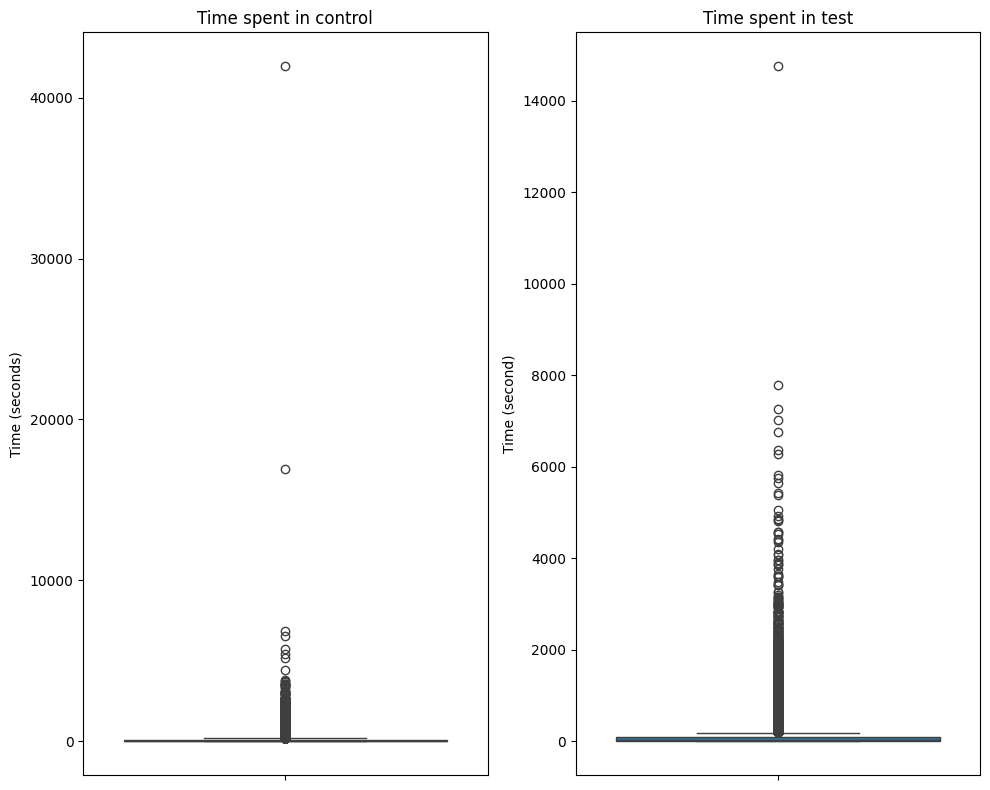

In [54]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(y='time_in_second', data=df_valid_control_time)
plt.title('Time spent in control')
plt.ylabel('Time (seconds)')
plt.subplot(1,2,2)
sns.boxplot(y='time_in_second', data=df_valid_test_time)
plt.title('Time spent in test')
plt.ylabel('Time (second)')

plt.tight_layout()
plt.show()


In [55]:
df_valid_test_time['time_in_second'].describe()

count    91600.000000
mean        89.032260
std        207.686491
min          0.000000
25%         16.000000
50%         39.000000
75%         87.000000
max      14758.000000
Name: time_in_second, dtype: float64

In [56]:
df_valid_control_time['time_in_second'].describe()

count    75956.000000
mean        90.774843
std        239.337204
min          0.000000
25%         17.000000
50%         44.000000
75%         95.000000
max      41957.000000
Name: time_in_second, dtype: float64

Remove outliers

In [ ]:
df_time_control_no_outliers = f.remove_outliers(df_valid_control_time, 'time_in_second')
df_time_test_no_outliers = f.remove_outliers(df_valid_test_time, 'time_in_second')

Lower Bound: -100.0
Upper Bound: 212.0
Lower Bound: -90.5
Upper Bound: 193.5


In [59]:
# create series with control and test step_time 
time_test = df_time_test_no_outliers['time_in_second']
time_control = df_time_control_no_outliers['time_in_second']

In [60]:
time_test.describe()

count    82959.000000
mean        47.874167
std         42.880994
min          0.000000
25%         14.000000
50%         34.000000
75%         68.000000
max        193.000000
Name: time_in_second, dtype: float64

In [61]:
time_control.describe()

count    69360.000000
mean        53.372607
std         47.276640
min          0.000000
25%         16.000000
50%         39.000000
75%         76.000000
max        211.000000
Name: time_in_second, dtype: float64

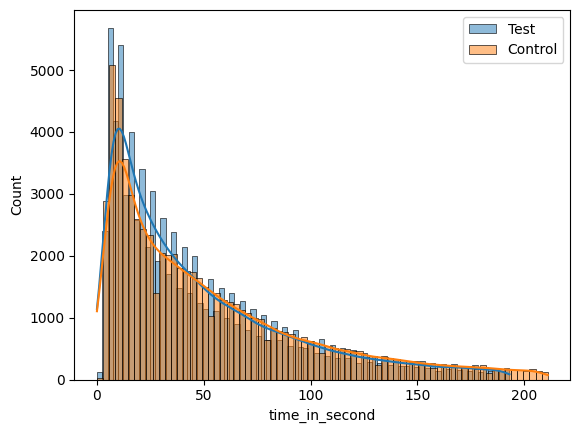

In [62]:
sns.histplot(time_test, kde=True, label='Test')
sns.histplot(time_control, kde=True, label='Control')
plt.legend()
plt.show()